In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing data

In [2]:
data = pd.read_csv('../data/covid19_metabolites.csv')

In [3]:
data

,SubjectId,Group,Sex,Age,Creatinine,Glycine,Alanine,Serine,Proline,Valine,...,Hydroxybutyrylcarnitine,Octanoylcarnitine,Decadienoylcarnitine,Decenoylcarnitine,Decanoylcarnitine,Dodecenoylcarnitine,Dodecanoylcarnitine,Hexadecanoylcarnitine,Octadecadienylcarnitine,Octadecenoylcarnitine
0,CV19-0007A,Control,Female,68.0,166.0,230.0,236.0,117.0,151.0,170.0,...,0.2001,0.1216,0.0789,0.2072,0.2437,0.1584,0.1266,0.2262,0.1301,0.2876
1,CV19-0071A,Control,Female,57.0,67.0,233.0,343.0,89.2,151.0,145.0,...,0.0741,0.2256,0.0695,0.2310,0.3679,0.1526,0.1123,0.1534,0.1190,0.2378
2,CV19-0079A,Control,Male,39.0,69.2,250.0,371.0,129.0,175.0,207.0,...,0.0416,0.0951,0.0996,0.1439,0.1661,0.0977,0.0860,0.2005,0.1604,0.3066
3,CV19-0118A,Control,Female,40.0,54.2,190.0,415.0,103.0,165.0,149.0,...,0.0291,0.2326,0.0705,0.2509,0.3039,0.1262,0.0775,0.0983,0.0702,0.1598
4,CV19-0125A,Control,Female,40.0,63.1,189.0,373.0,94.5,167.0,158.0,...,0.0592,0.1857,0.0709,0.2856,0.3549,0.1938,0.1446,0.1281,0.0998,0.2283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,CV19-0830A,Covid,Female,51.0,89.9,117.0,273.0,58.3,125.0,245.0,...,0.1570,0.1348,0.1569,0.2186,0.4441,0.1232,0.0938,0.1326,0.1060,0.2467
227,CV19-0833A,Covid,Male,65.0,112.0,162.0,497.0,88.7,111.0,275.0,...,0.0738,0.2481,0.1557,0.3837,0.6554,0.1521,0.0903,0.1158,0.0797,0.1718
228,CV19-0834A,Covid,Male,66.0,114.0,181.0,574.0,90.8,206.0,247.0,...,0.1481,0.2395,0.1776,0.3464,0.3441,0.2043,0.1211,0.1922,0.1354,0.3183
229,CV19-0932A,Covid,Male,53.0,68.3,321.0,551.0,163.0,219.0,552.0,...,1.0753,0.3273,0.1791,0.4793,0.5729,0.2027,0.1921,0.1784,0.1350,0.3122


In [4]:
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nFirst Five Rows:\n", data.head())

Dataset Shape: (231, 111)

Data Types:
 SubjectId                   object
Group                       object
Sex                         object
Age                        float64
Creatinine                 float64
                            ...   
Dodecenoylcarnitine        float64
Dodecanoylcarnitine        float64
Hexadecanoylcarnitine      float64
Octadecadienylcarnitine    float64
Octadecenoylcarnitine      float64
Length: 111, dtype: object

First Five Rows:
     SubjectId    Group     Sex   Age  Creatinine  Glycine  Alanine  Serine  \
0  CV19-0007A  Control  Female  68.0       166.0    230.0    236.0   117.0   
1  CV19-0071A  Control  Female  57.0        67.0    233.0    343.0    89.2   
2  CV19-0079A  Control    Male  39.0        69.2    250.0    371.0   129.0   
3  CV19-0118A  Control  Female  40.0        54.2    190.0    415.0   103.0   
4  CV19-0125A  Control  Female  40.0        63.1    189.0    373.0    94.5   

   Proline  Valine  ...  Hydroxybutyrylcarnitine  Octanoylca

In [5]:
# Summary of metadata
print("\nGroup Distribution:\n", data['Group'].value_counts())
print("\nSex Distribution:\n", data['Sex'].value_counts())
print("\nAge Summary:\n", data['Age'].describe())


Group Distribution:
 Group
Covid        144
Recovered     48
Control       39
Name: count, dtype: int64

Sex Distribution:
 Sex
Male      133
Female     98
Name: count, dtype: int64

Age Summary:
 count    231.000000
mean      52.756522
std       11.048188
min       28.000000
25%       43.000000
50%       53.000000
75%       61.000000
max       82.000000
Name: Age, dtype: float64


In [6]:
metabolite_columns = data.columns[4:]  # Assuming the first three columns are metadata
print("\nMetabolite Statistics:\n", data[metabolite_columns].describe())


Metabolite Statistics:
         Creatinine      Glycine      Alanine      Serine     Proline  \
count   231.000000   231.000000   231.000000  231.000000  231.000000   
mean     89.612664   229.641485   414.078603   99.753275  173.159389   
std     100.526402    89.166726   134.745050   28.307525   73.128629   
min      30.100000    89.400000   124.000000   40.600000   57.900000   
25%      58.450000   178.000000   319.500000   79.200000  123.500000   
50%      71.100000   216.000000   394.000000   97.200000  160.000000   
75%      89.206332   265.500000   481.500000  113.000000  210.000000   
max    1150.000000  1000.000000  1180.000000  195.000000  445.000000   

           Valine   Threonine     Taurine  Putrescine  trans-Hydroxyproline  \
count  231.000000  231.000000  231.000000  231.000000            231.000000   
mean   224.237991  102.764192   78.320524    0.088693              9.581048   
std     59.322464   41.462571   51.383279    0.047940              9.922296   
min     64

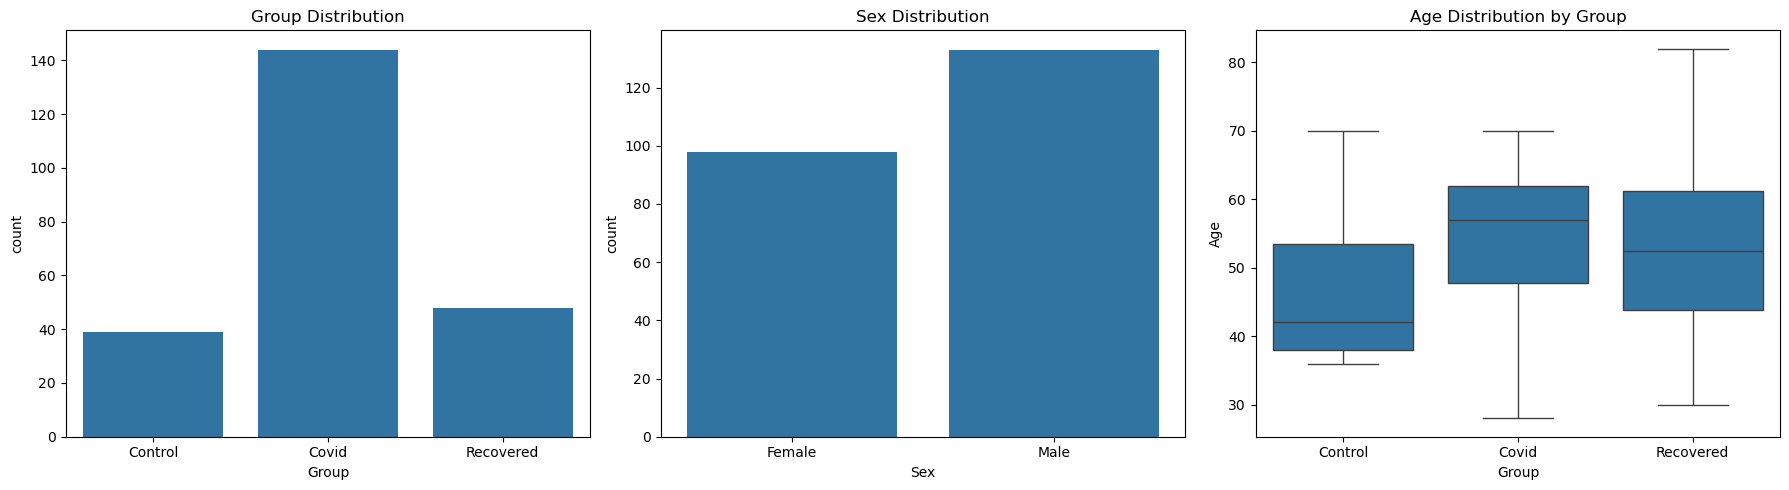

In [7]:
# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust figsize as needed

# Group distribution
sns.countplot(x='Group', data=data, ax=axes[0])
axes[0].set_title('Group Distribution')

# Sex distribution
sns.countplot(x='Sex', data=data, ax=axes[1])
axes[1].set_title('Sex Distribution')

# Age distribution by Group
sns.boxplot(x='Group', y='Age', data=data, ax=axes[2])
axes[2].set_title('Age Distribution by Group')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
fig.tight_layout(pad = 2.0)


# sns.countplot(x='Group', data=data)
# plt.title('Group Distribution')
# plt.show()

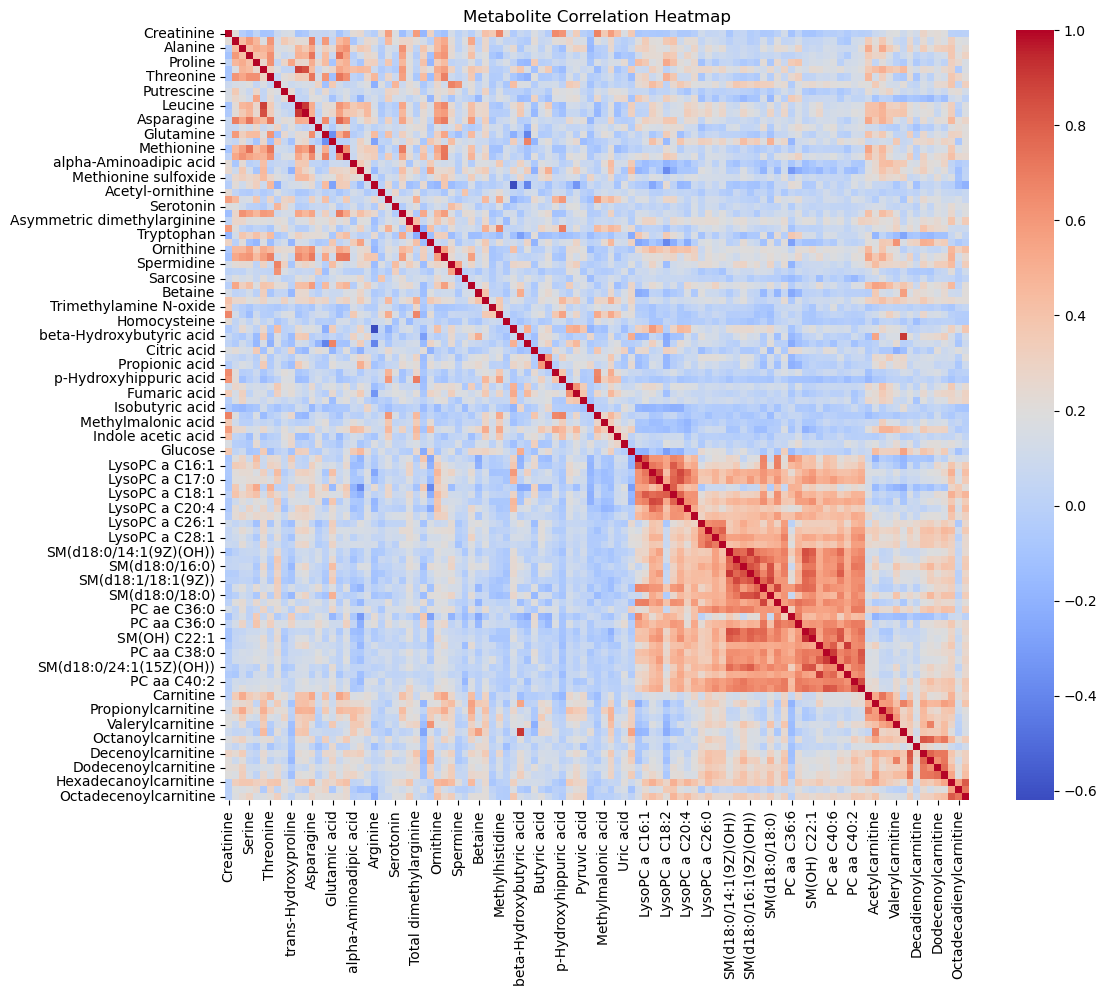

In [8]:
correlation_matrix = data[metabolite_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Metabolite Correlation Heatmap')
plt.show()

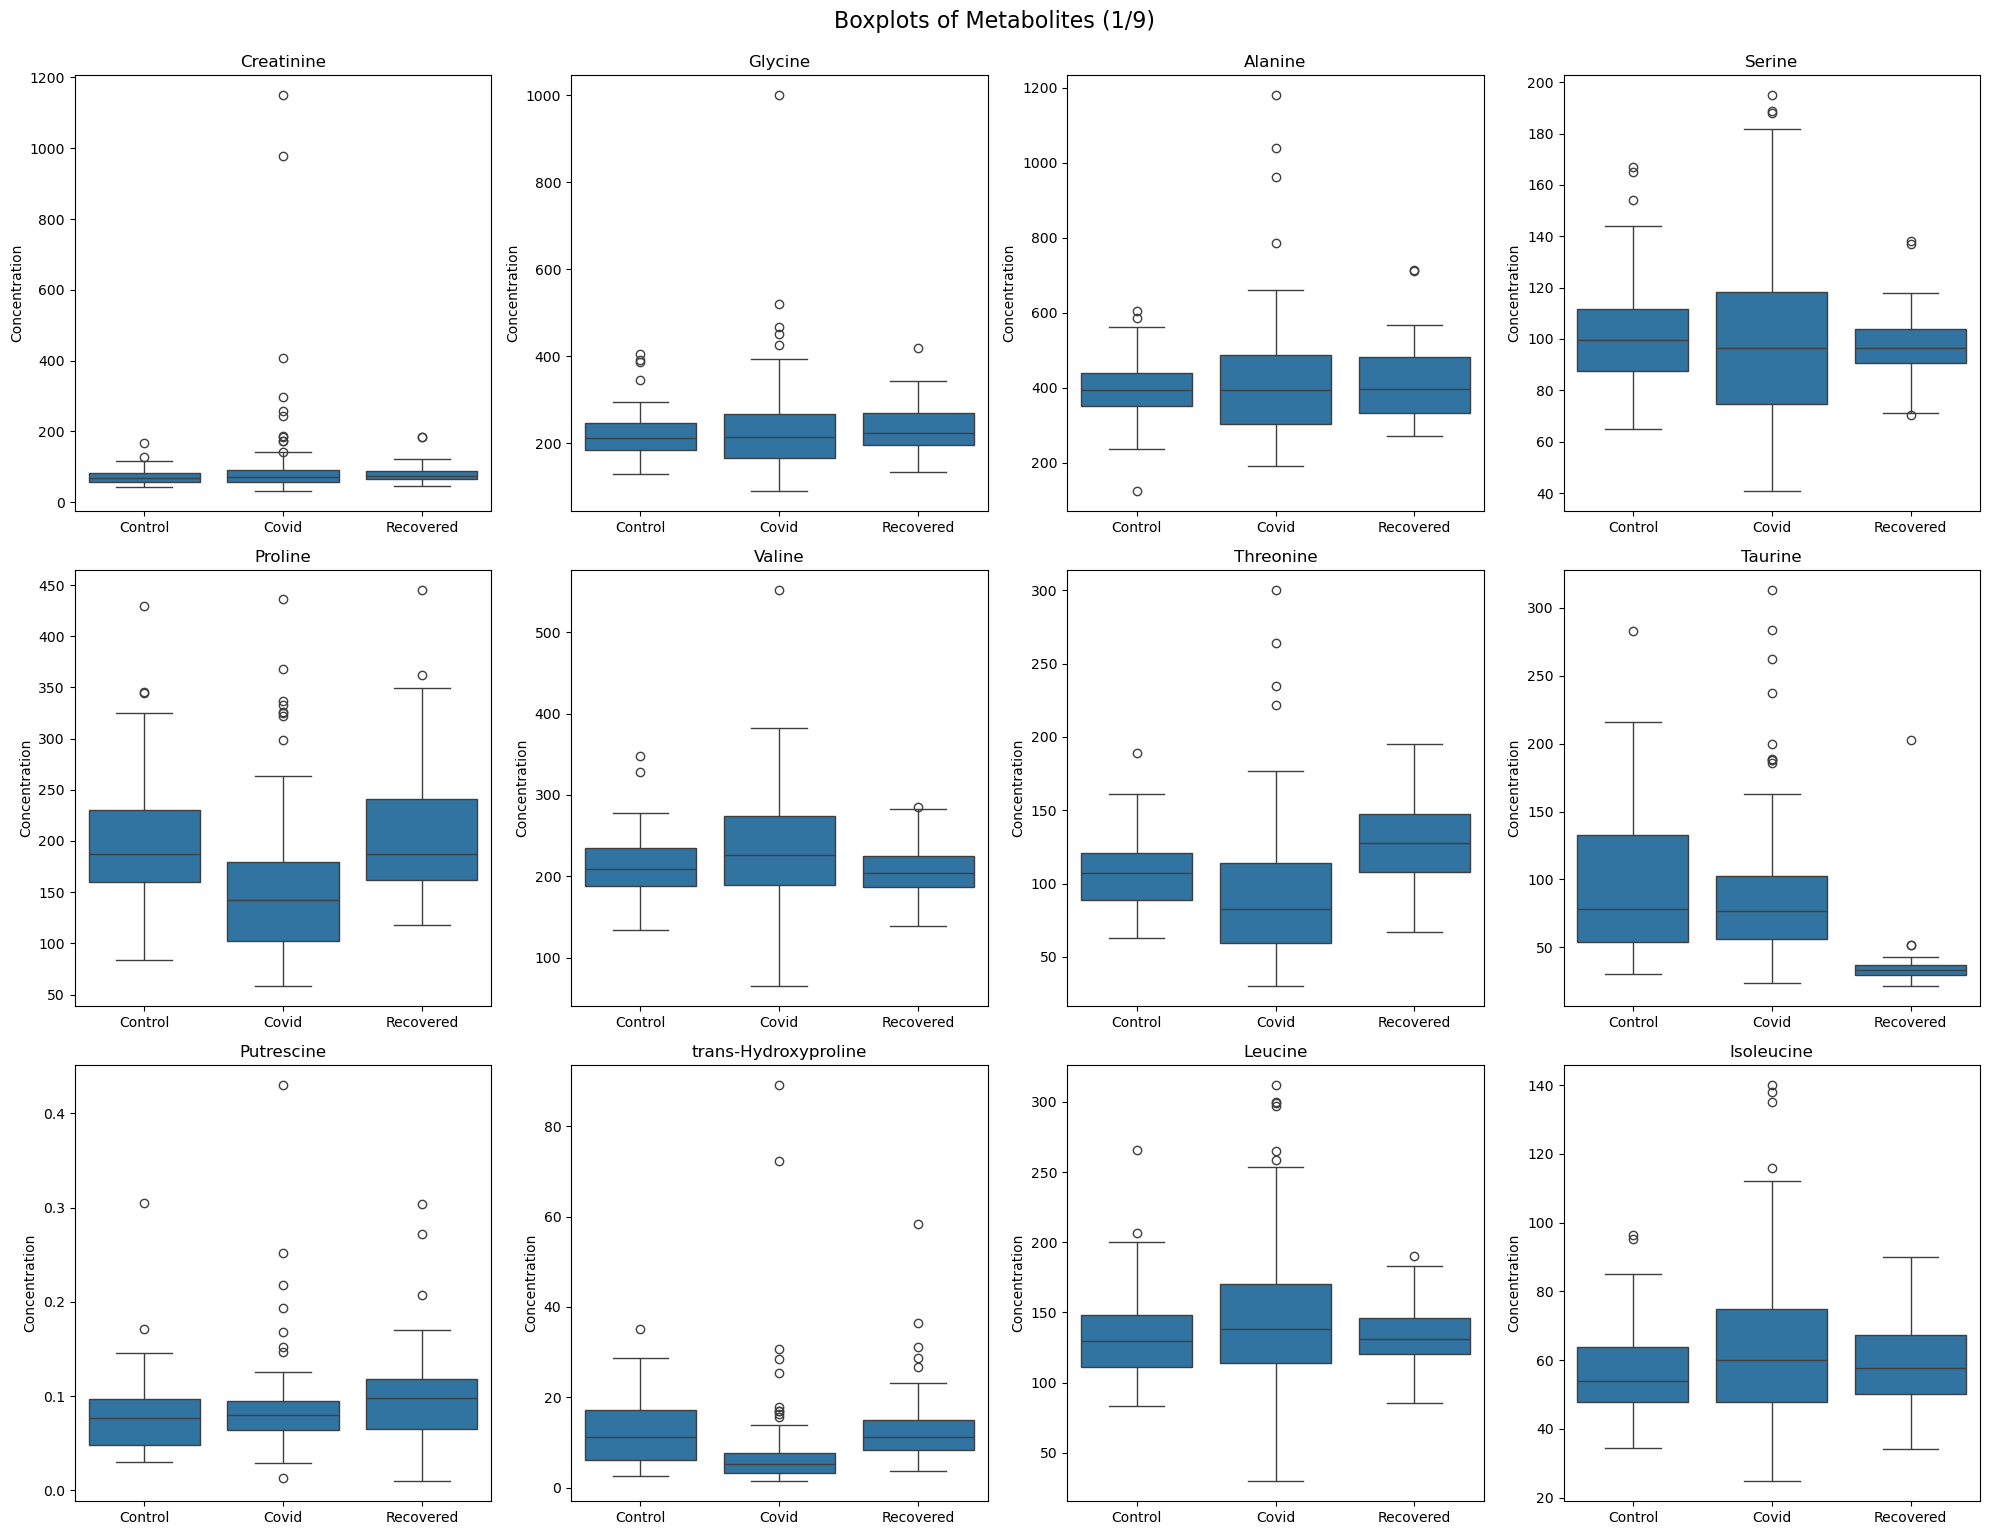

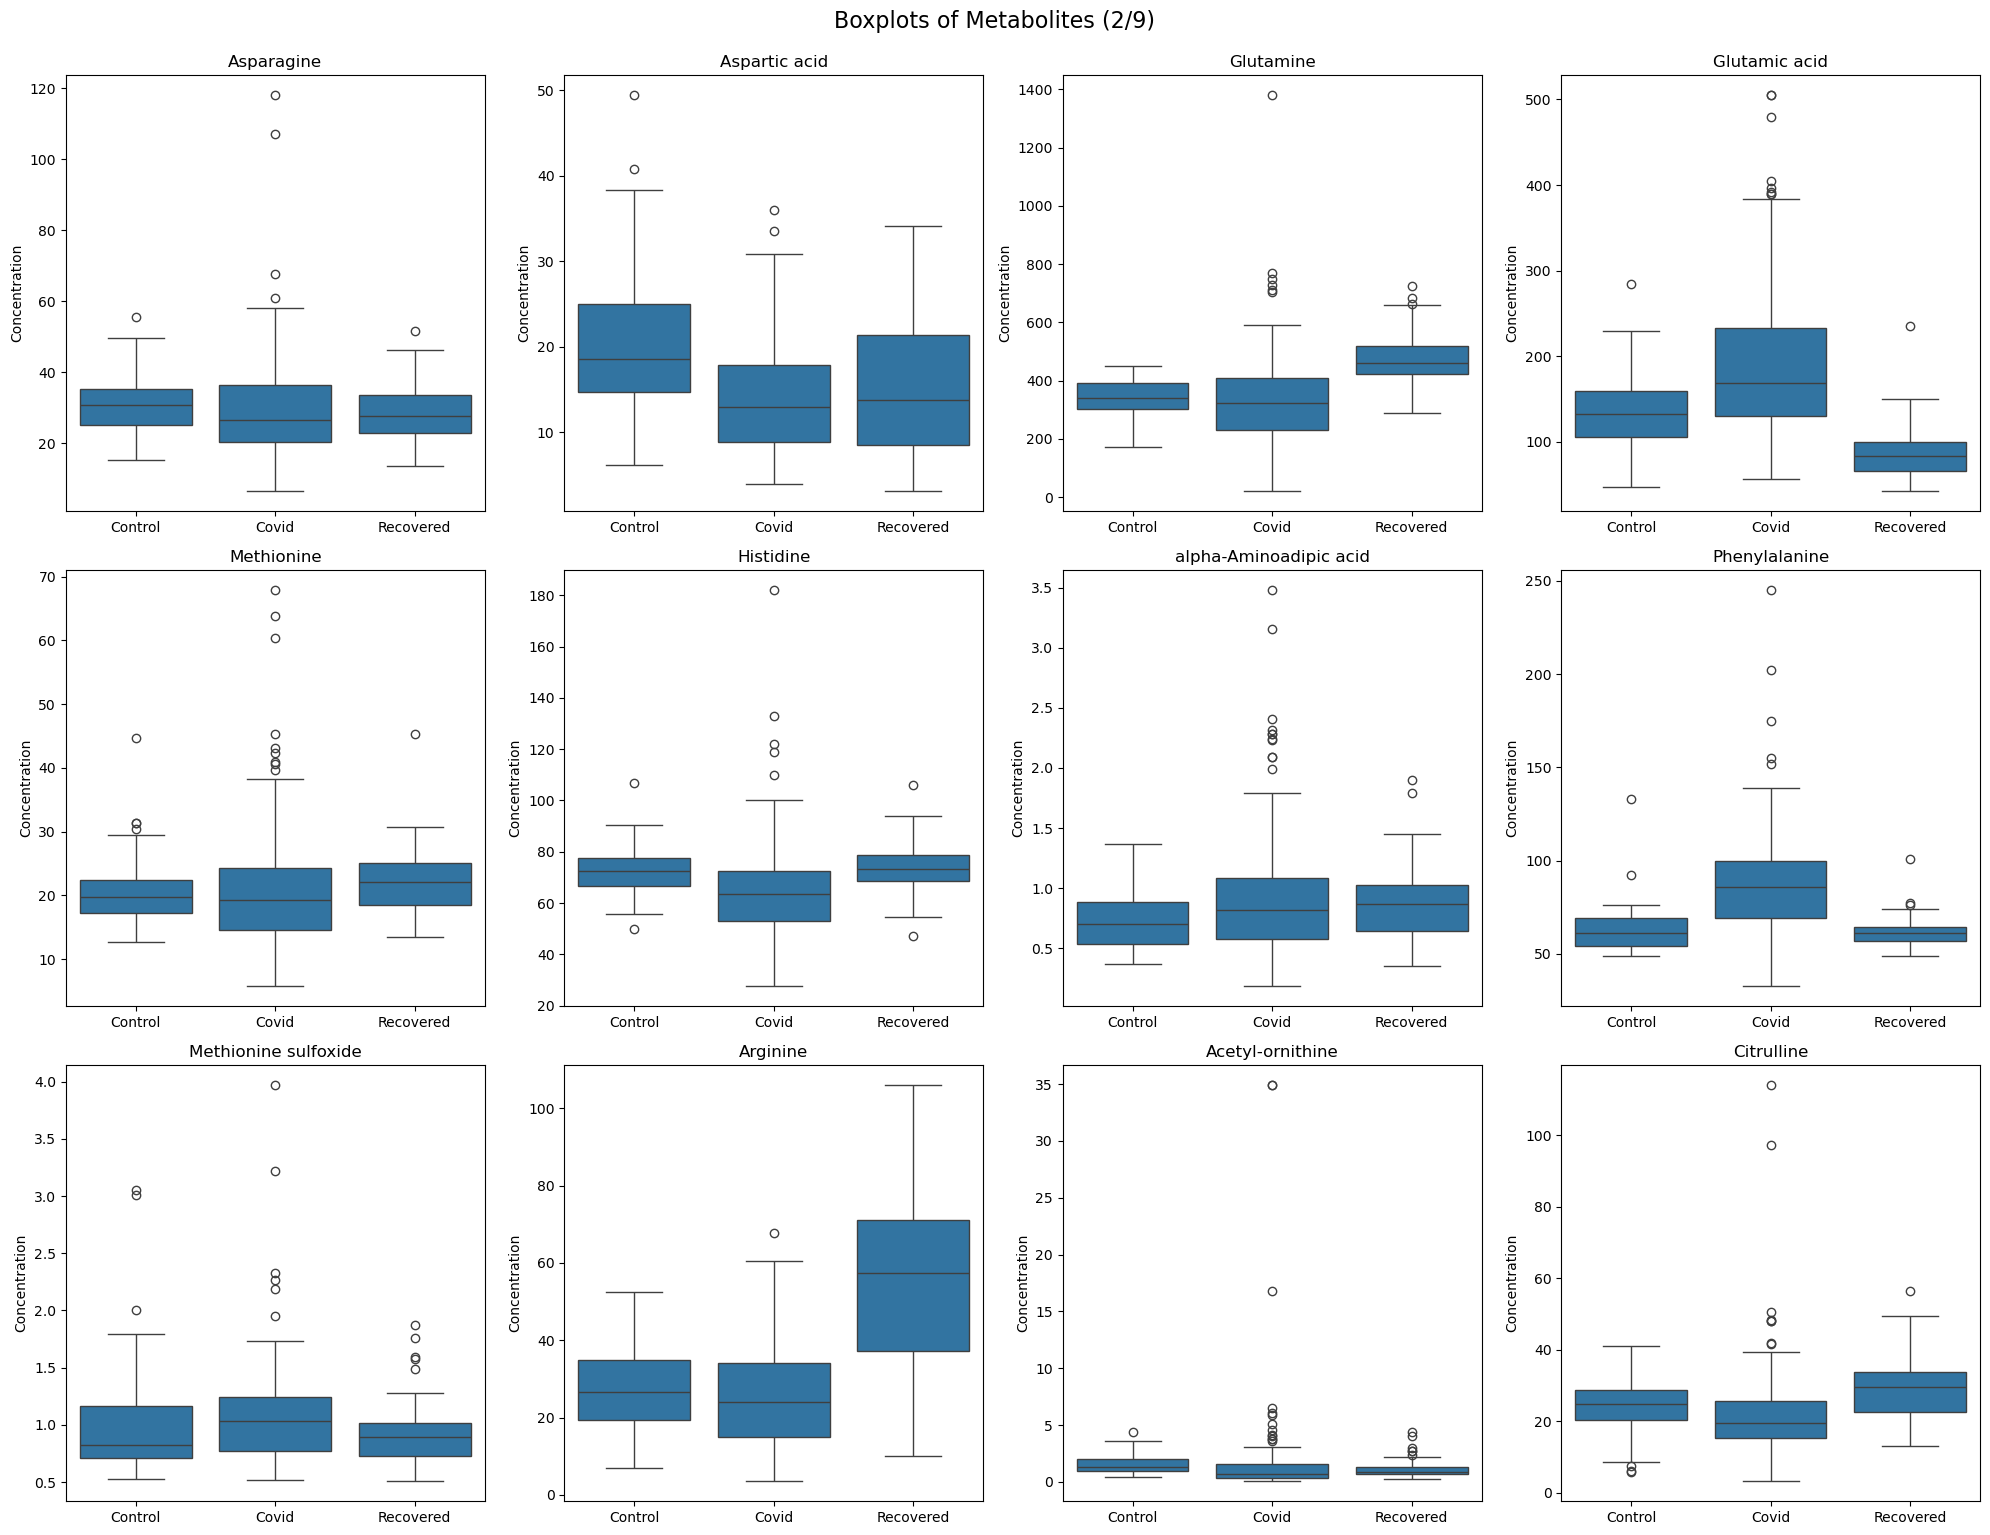

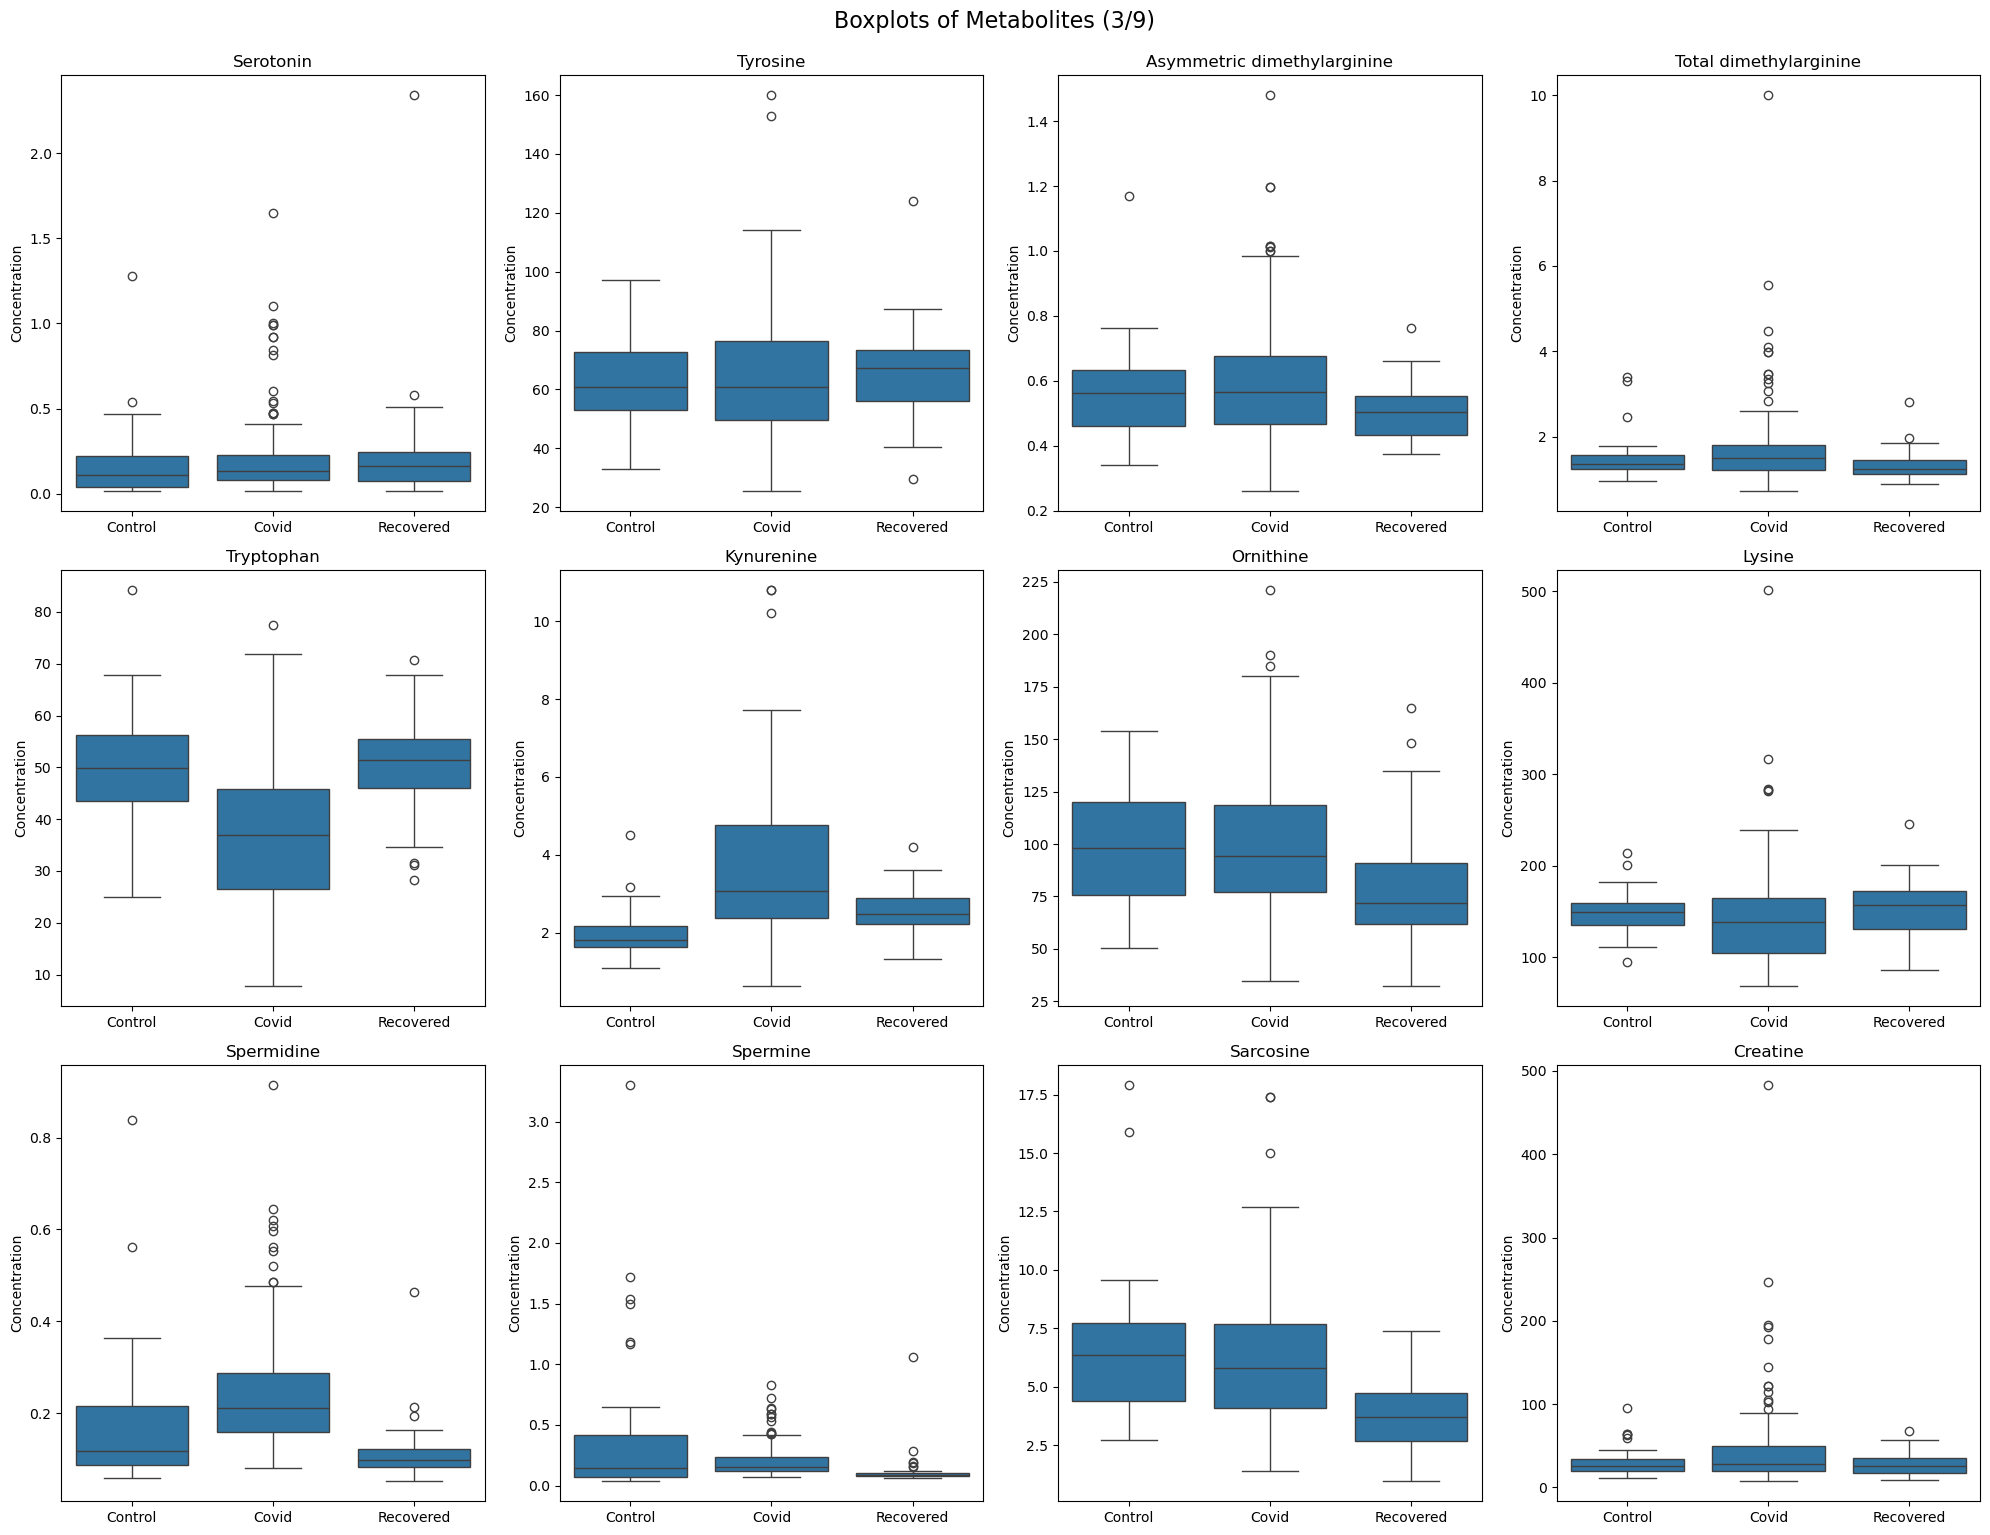

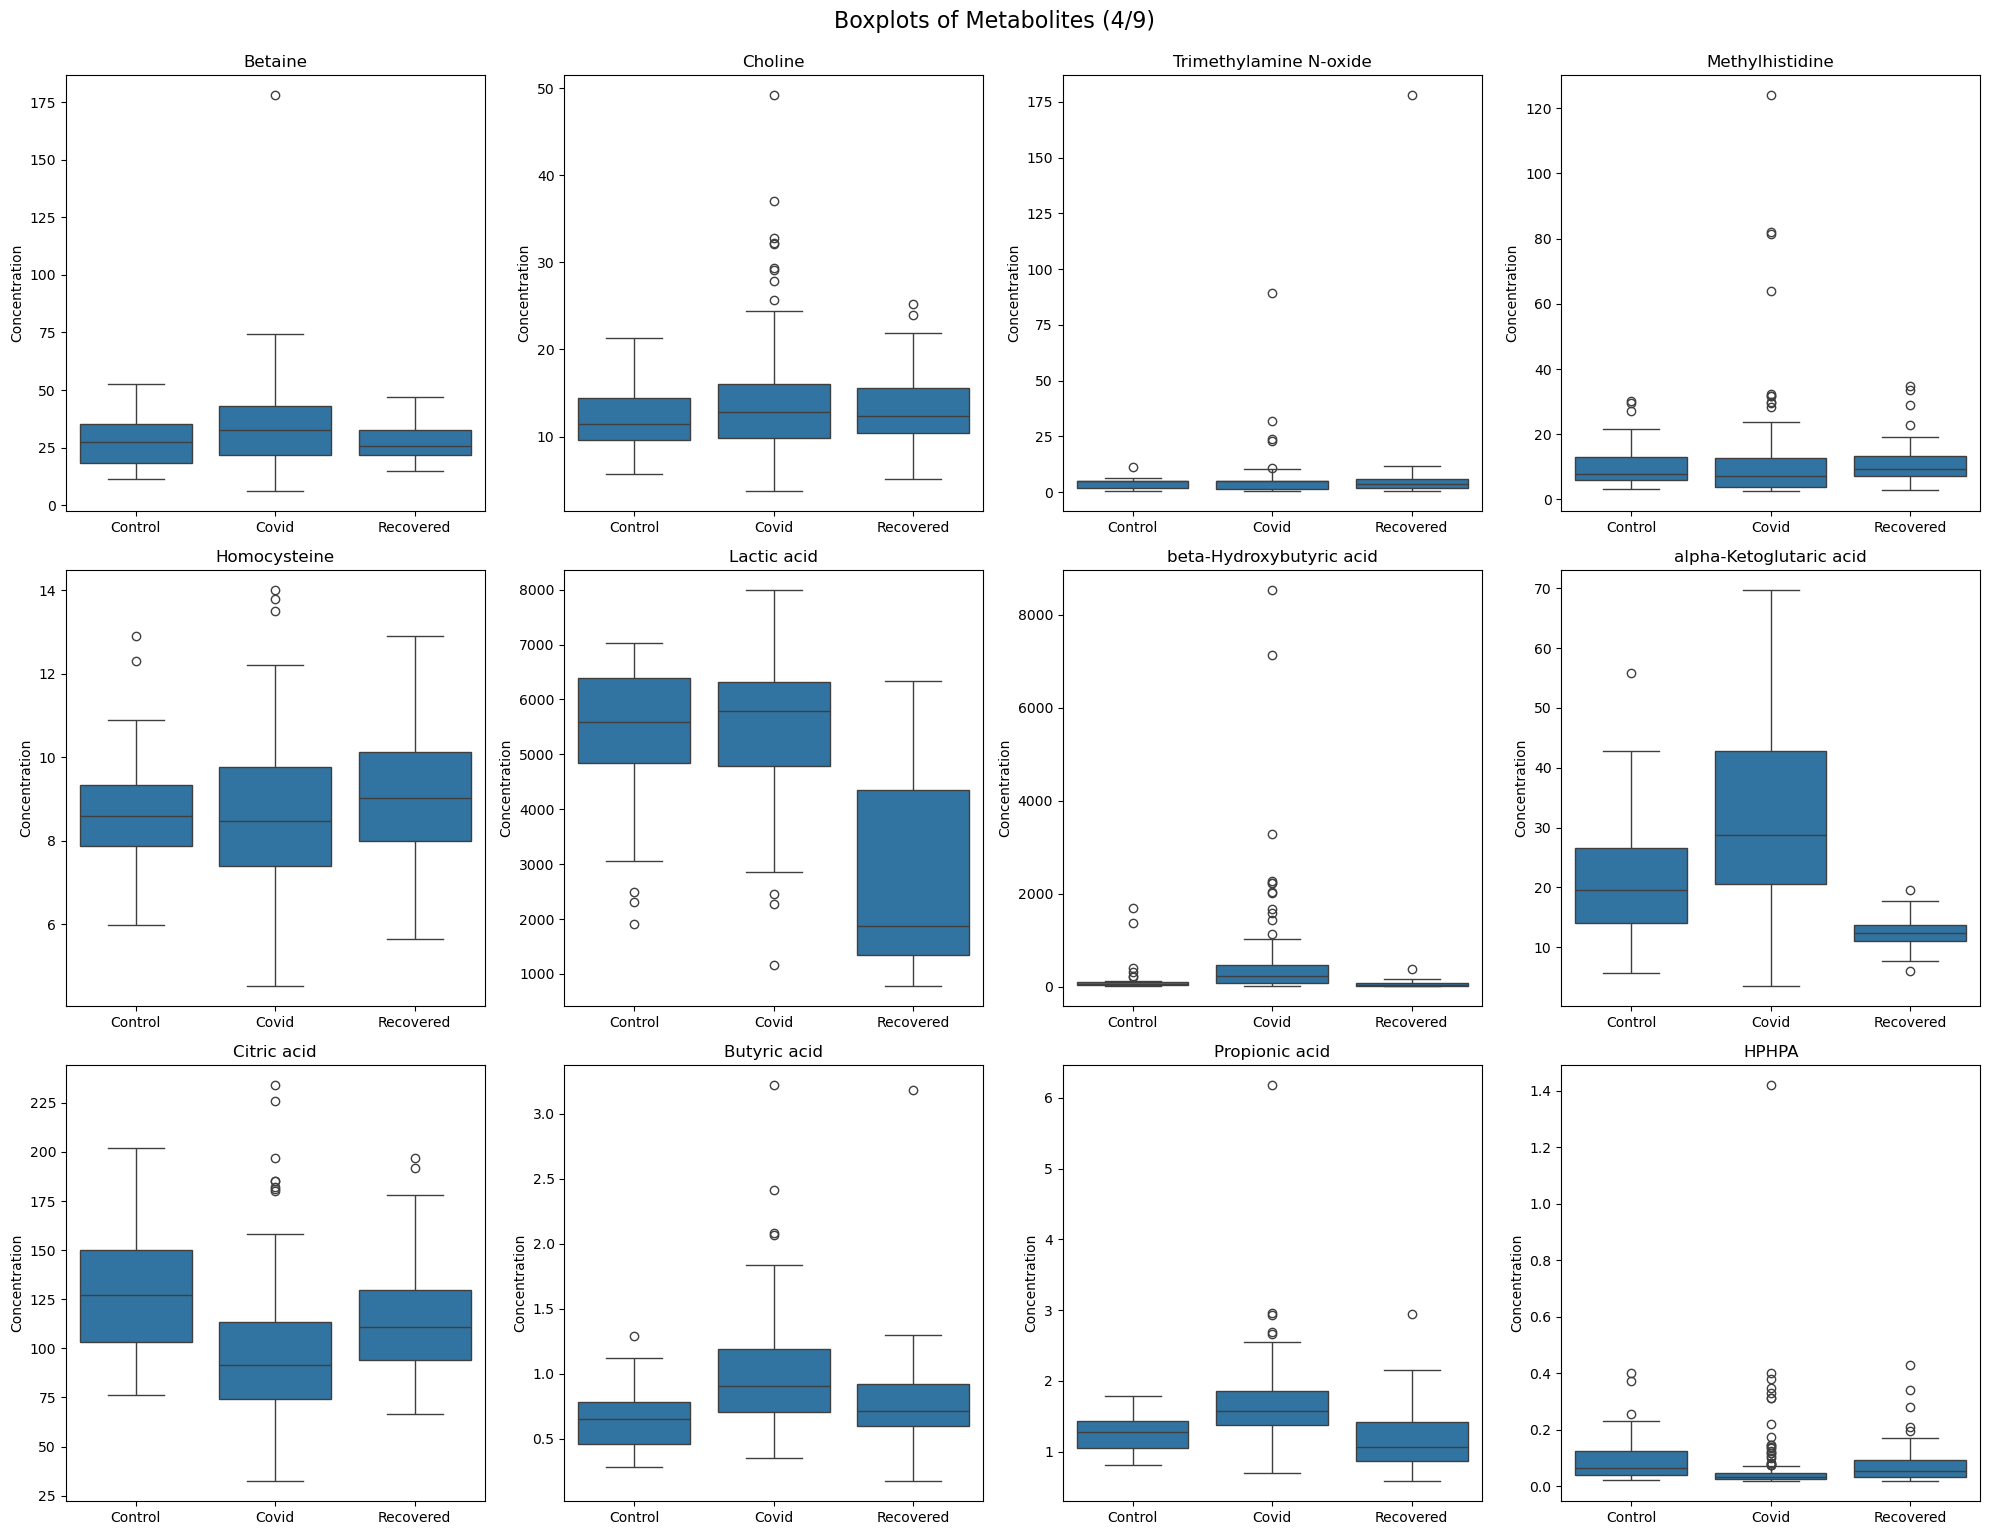

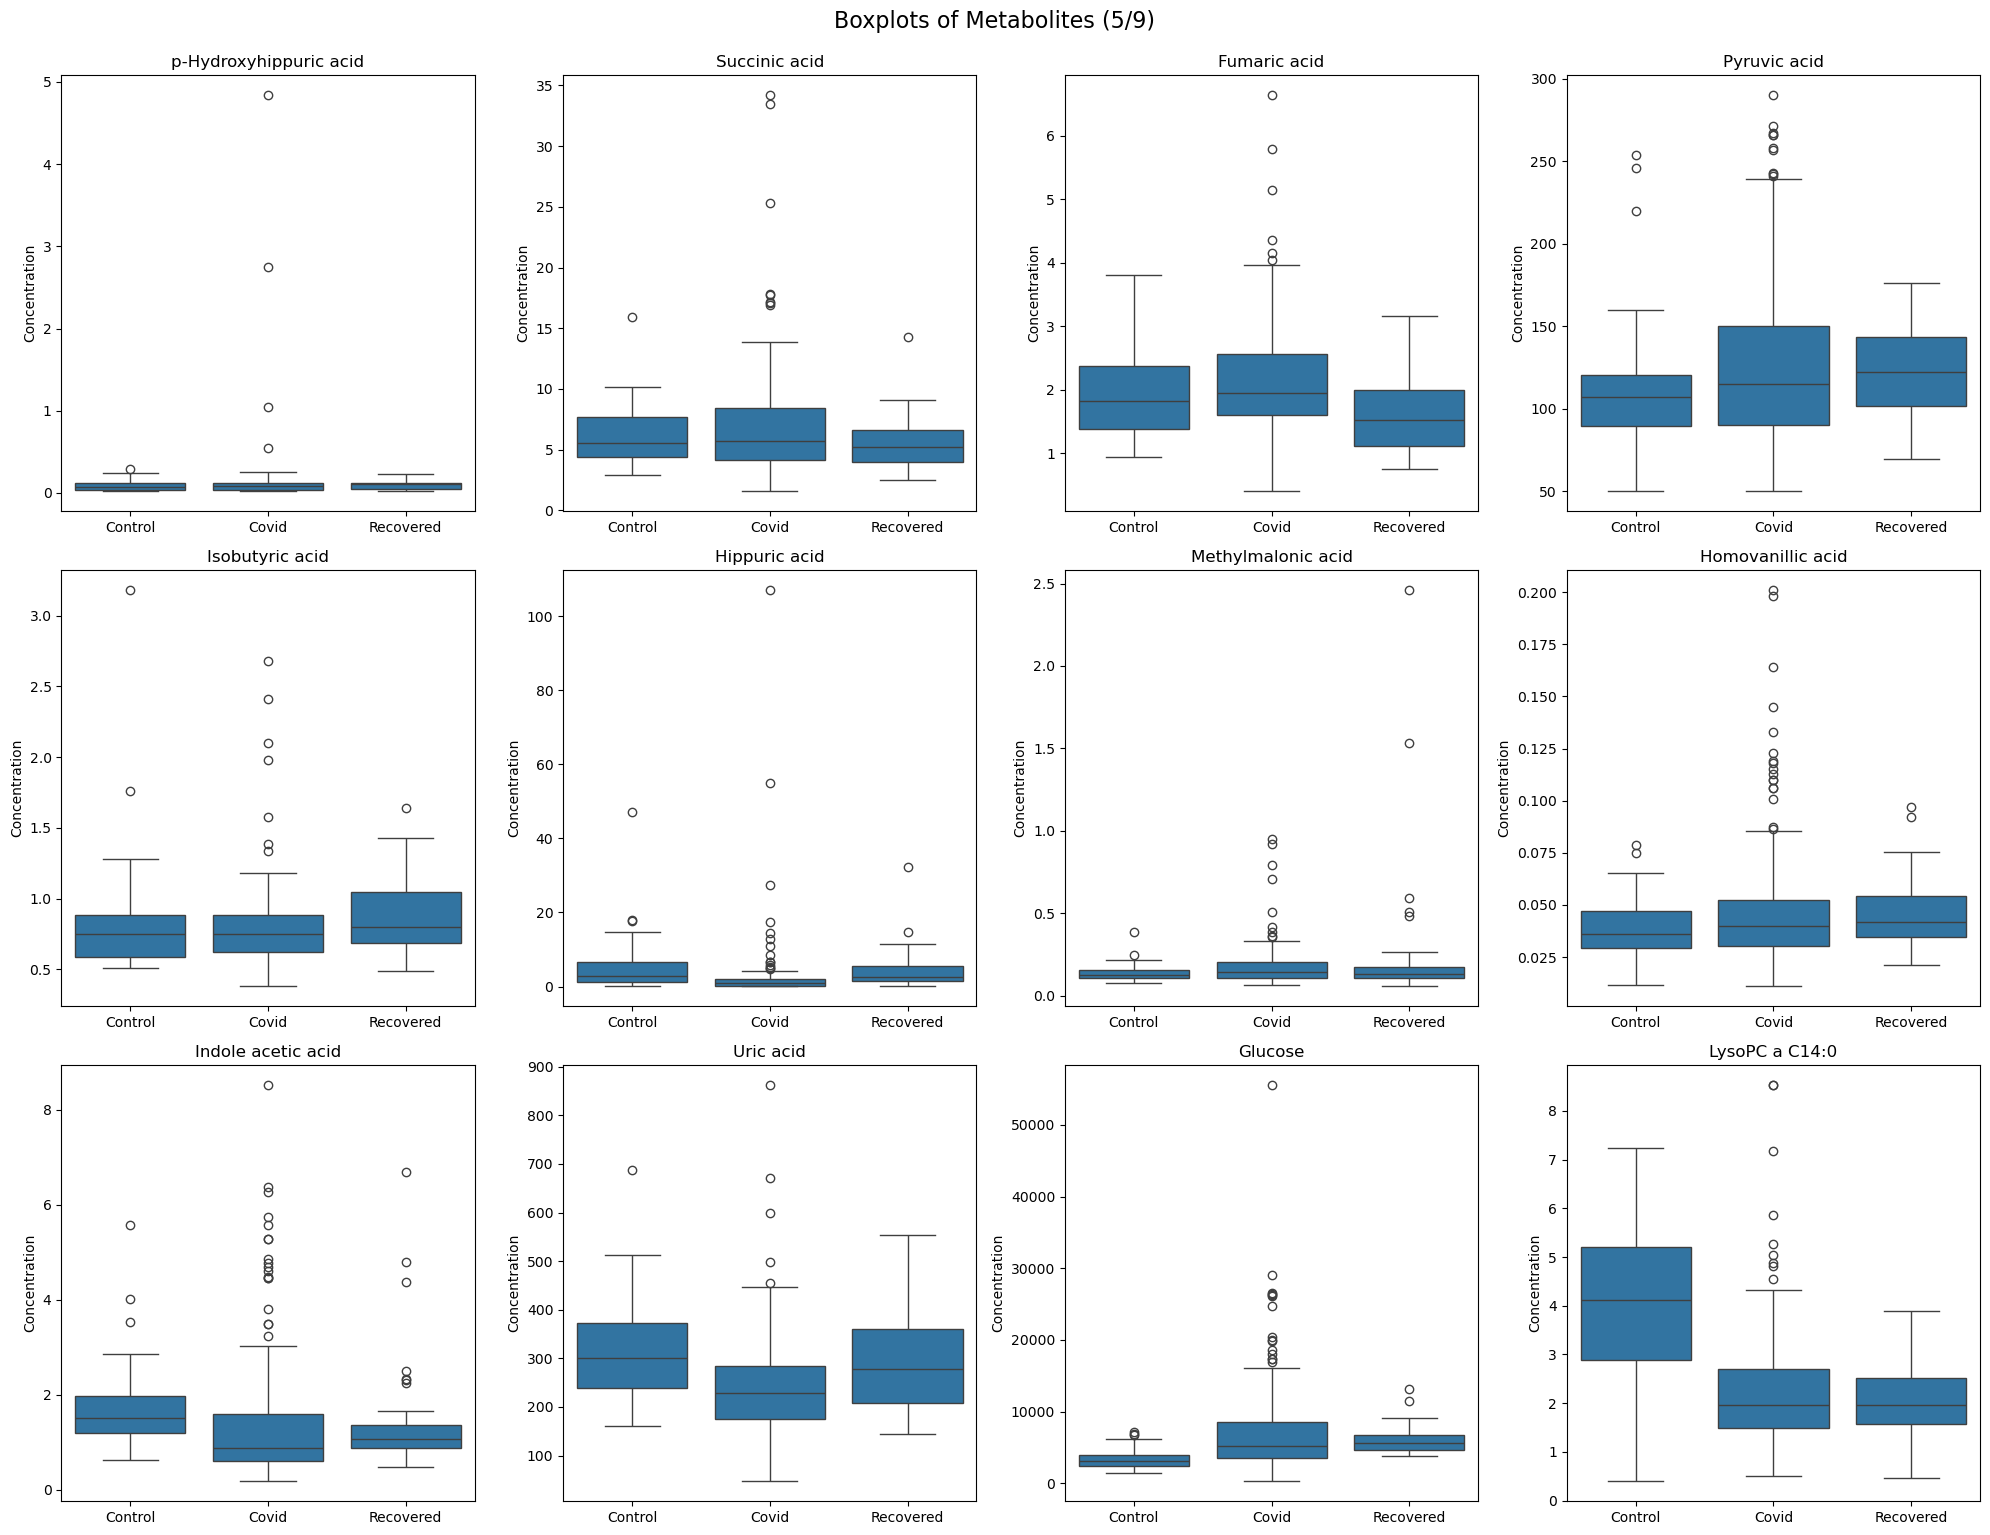

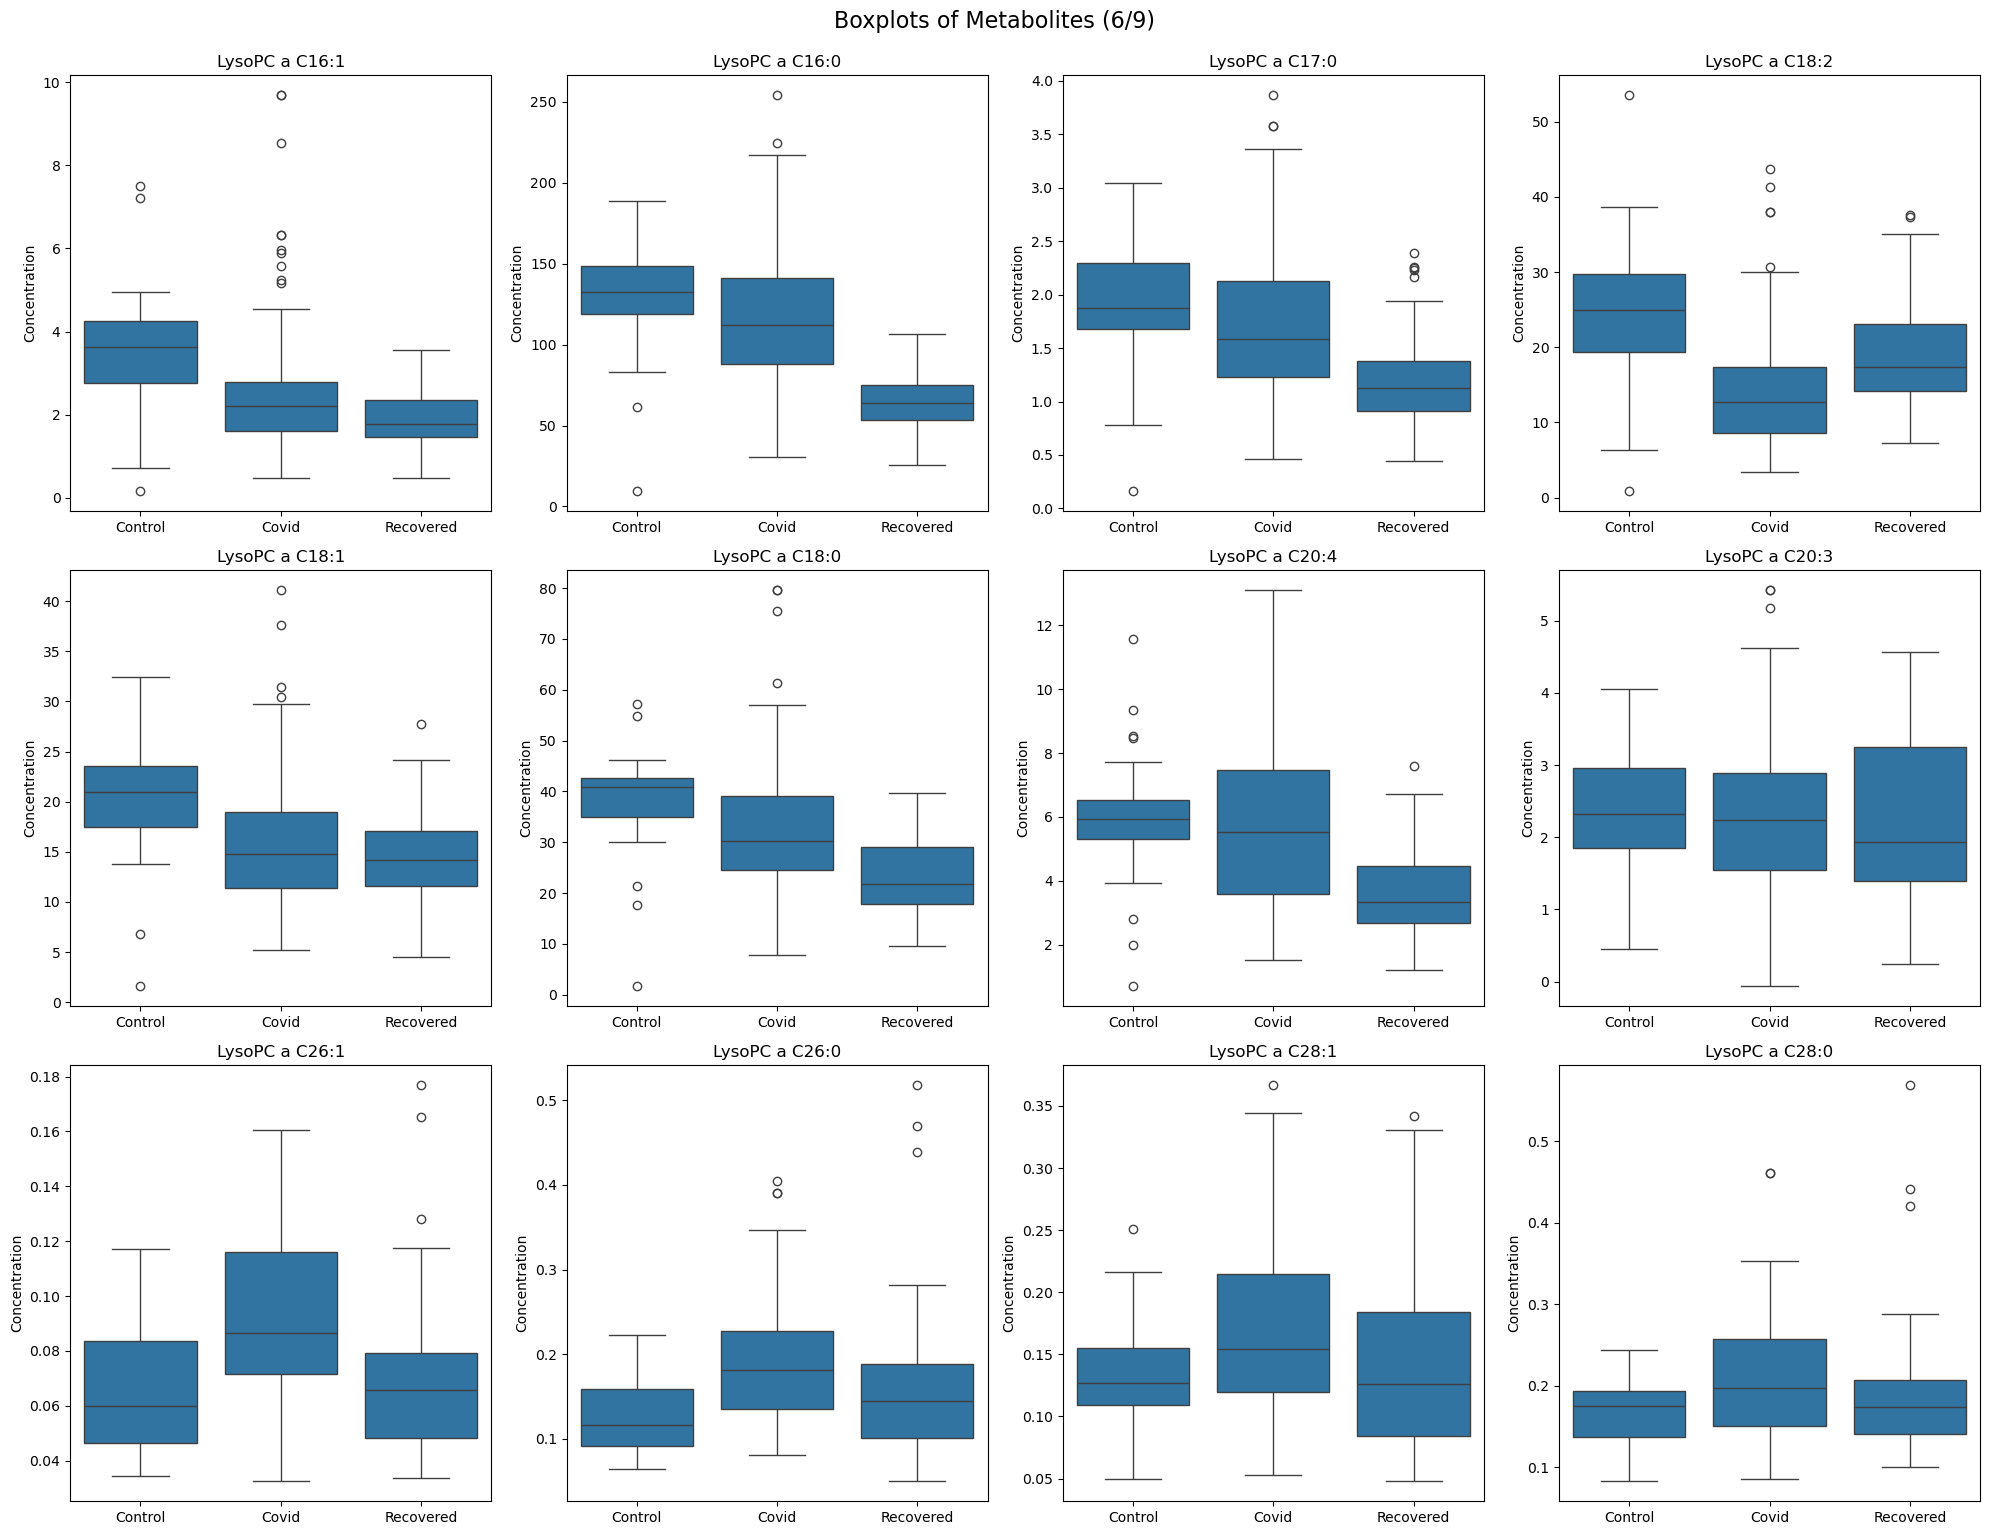

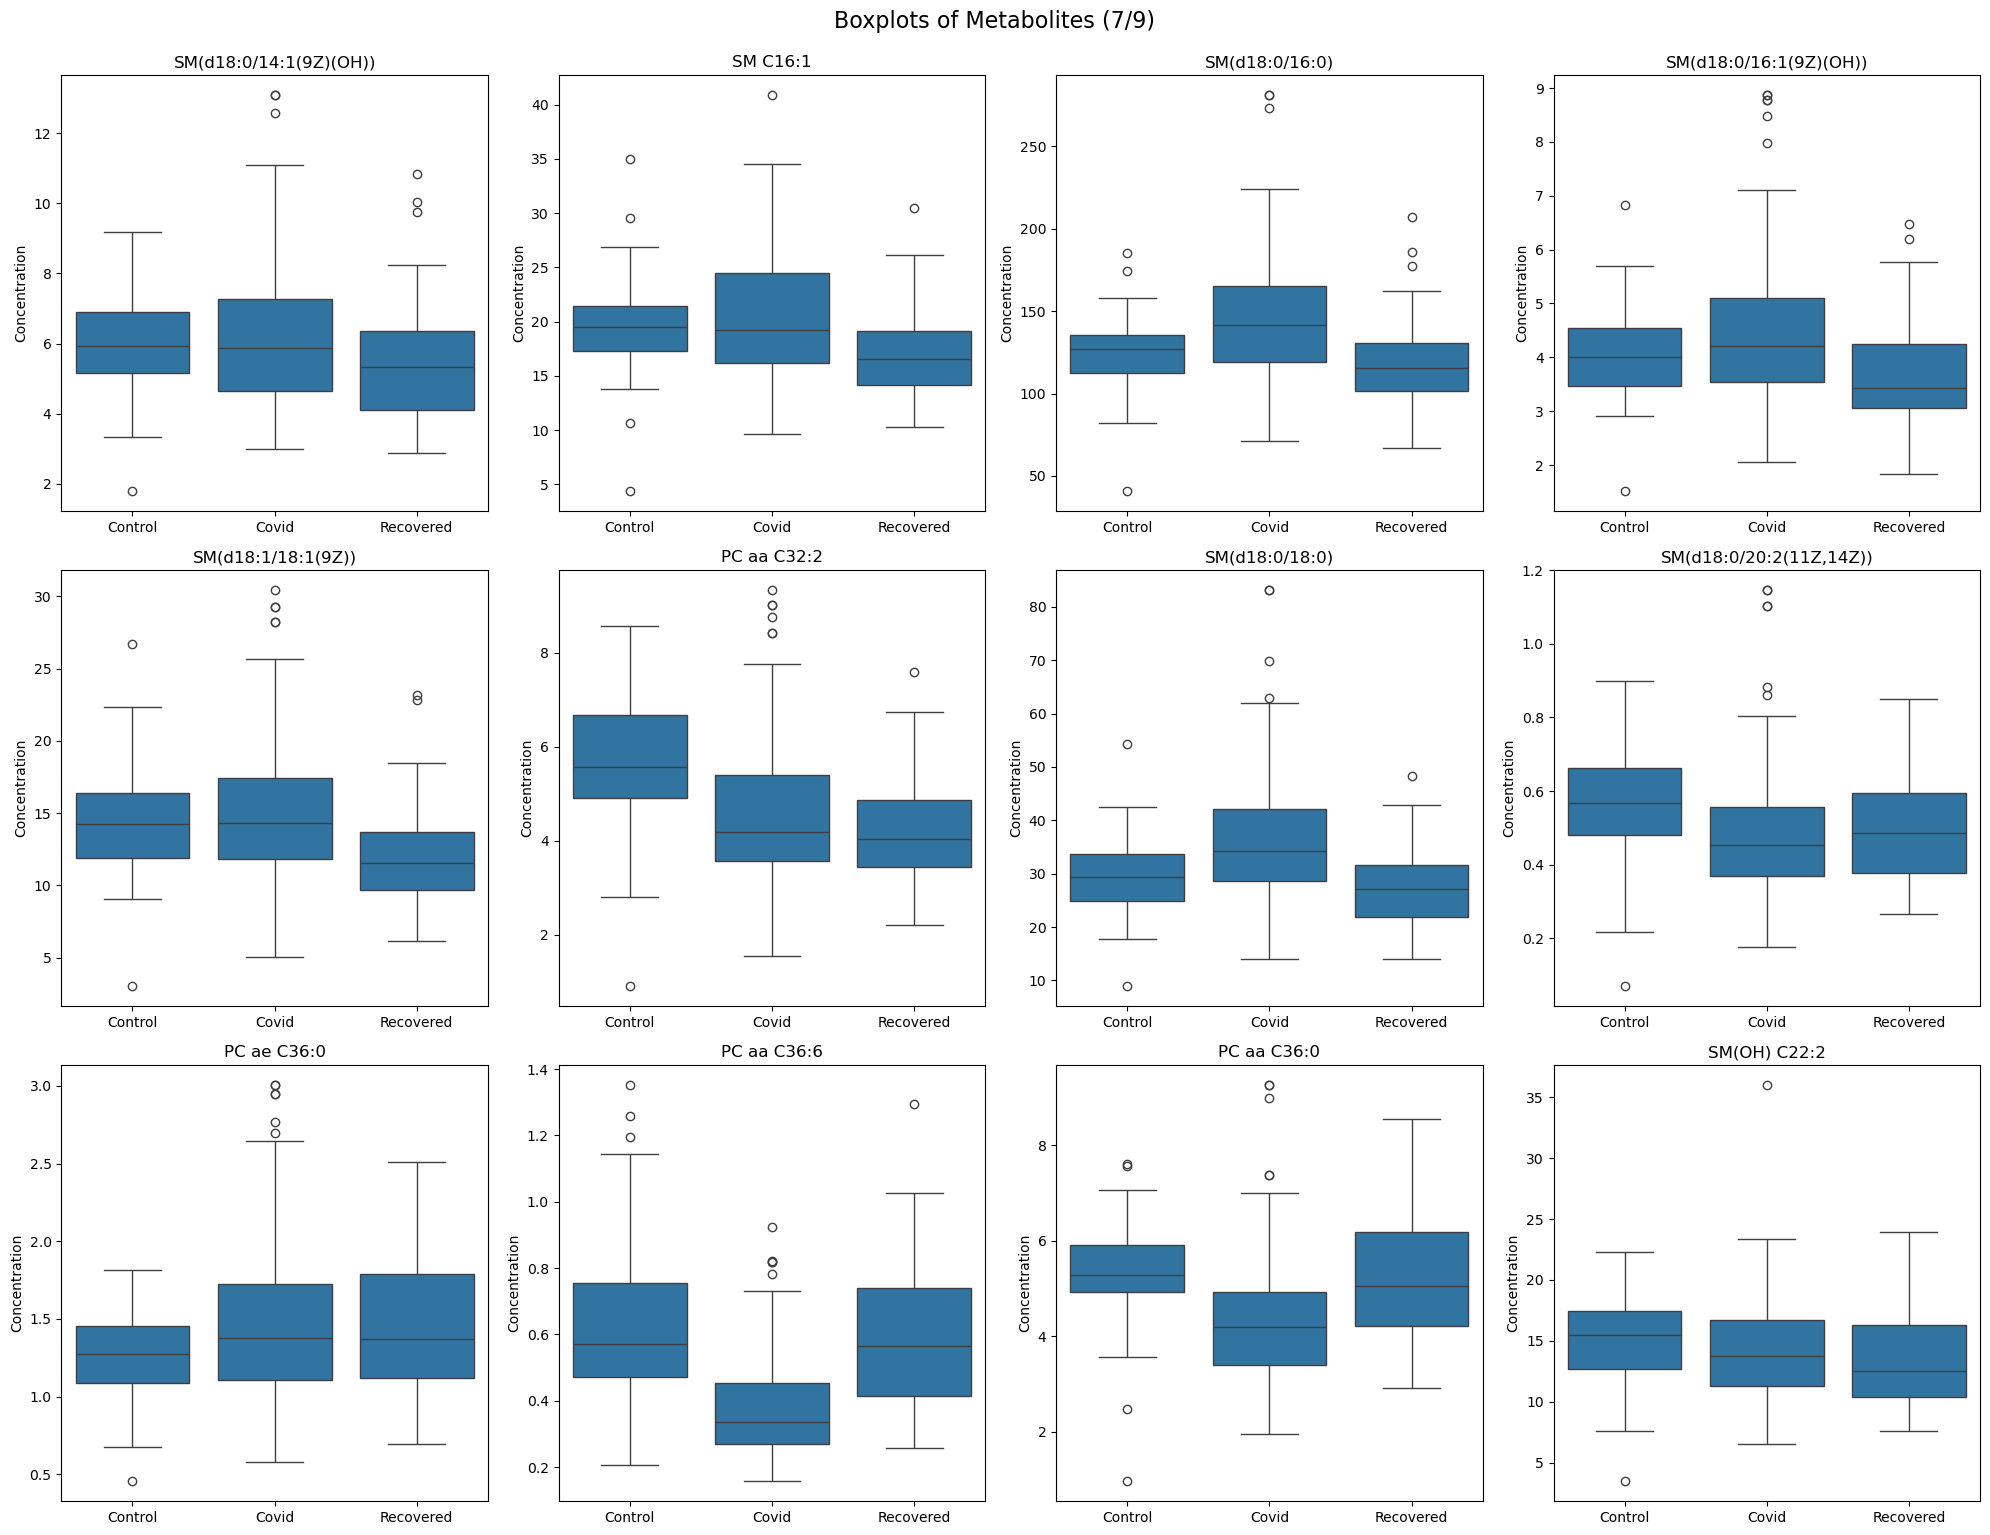

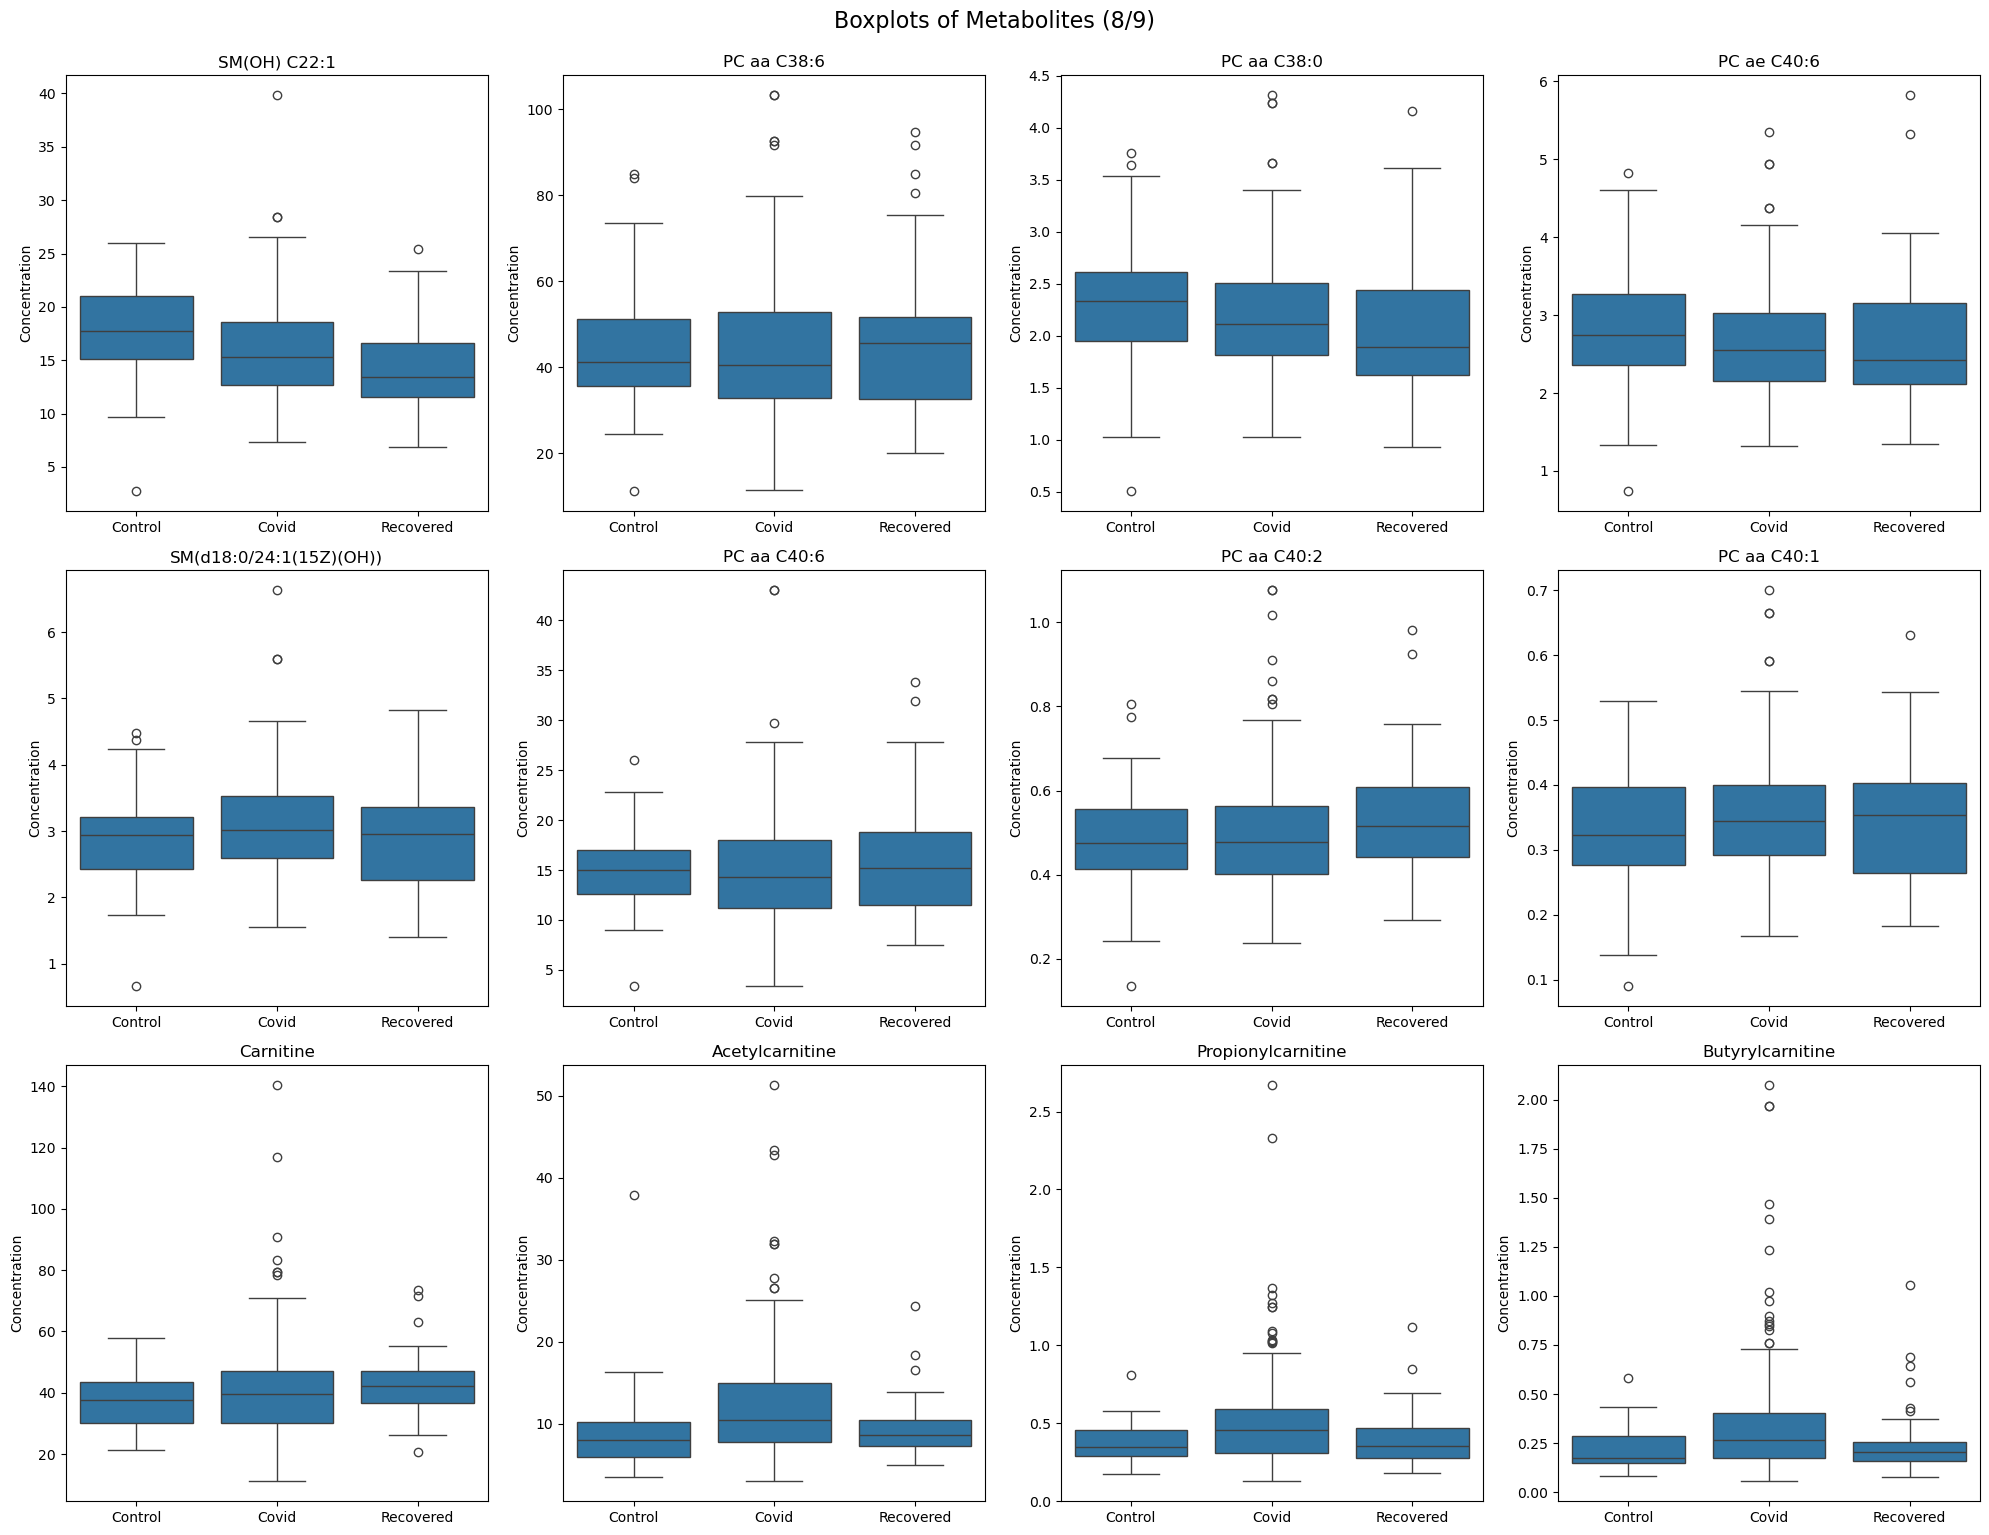

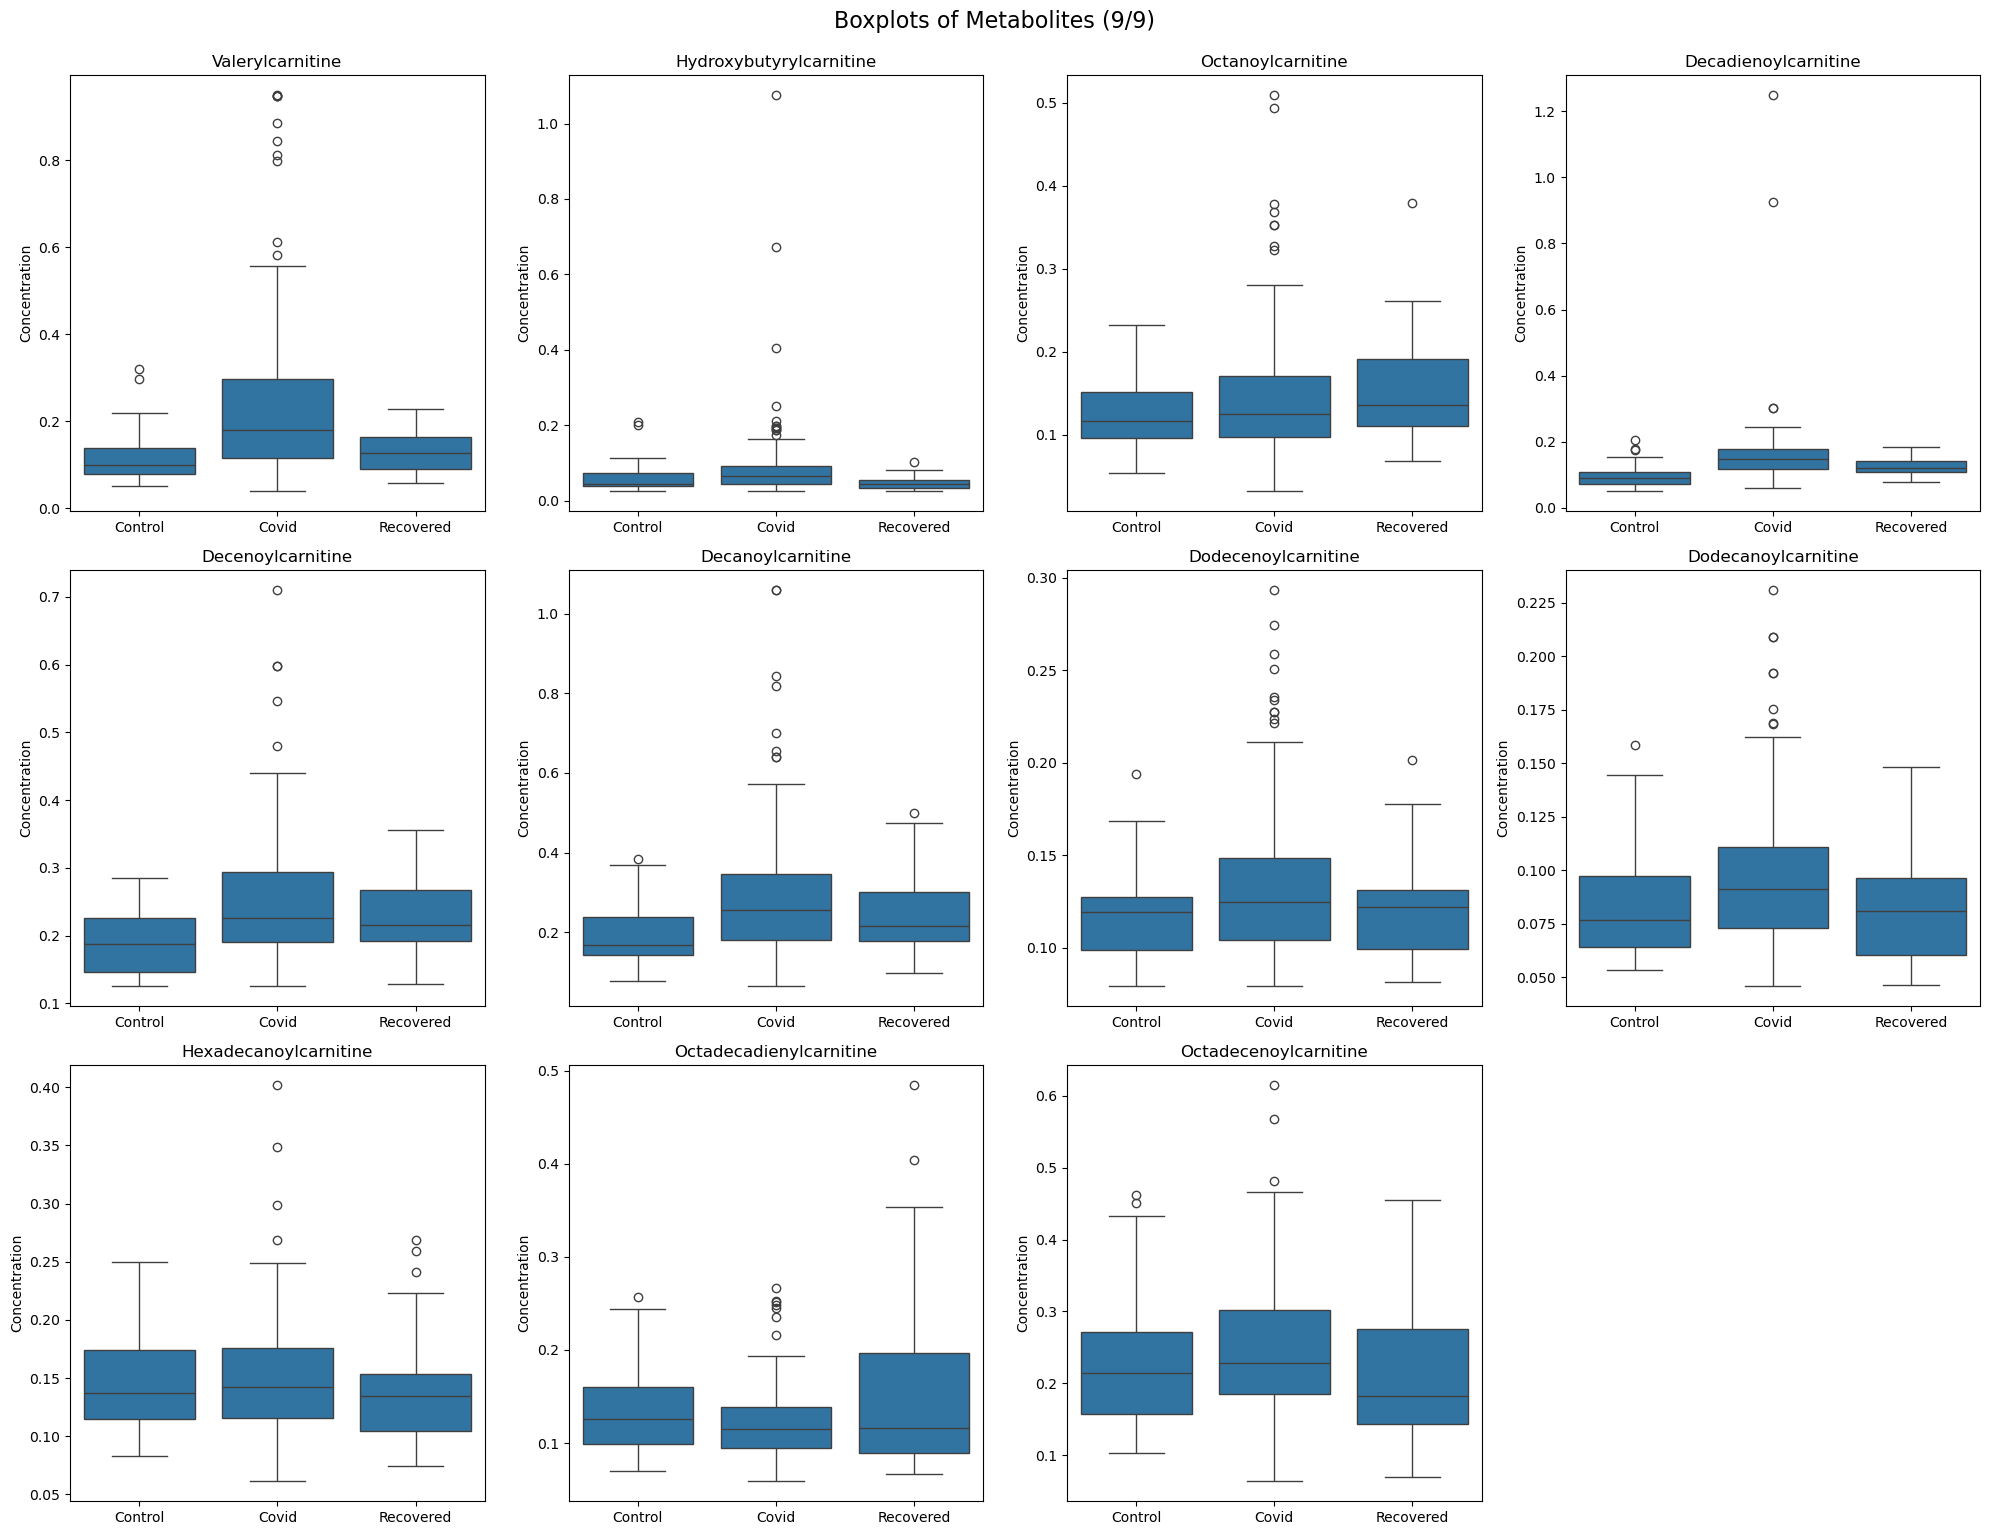

In [9]:
metabolites = data.columns[4:]

group_column = 'Group'  

# Number of plots per figure
plots_per_figure = 12  # Adjust as needed

# Number of rows and columns for subplots
n_rows = 3
n_cols = 4

# Calculate the total number of figures needed
num_figures = math.ceil(len(metabolites) / plots_per_figure)

# Loop through each figure
for fig_idx in range(num_figures):
    # Create a new figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    # Get the subset of metabolites for this figure
    start_idx = fig_idx * plots_per_figure
    end_idx = start_idx + plots_per_figure
    subset_metabolites = metabolites[start_idx:end_idx]

    # Loop through the subset and create boxplots
    for ax, metabolite in zip(axes, subset_metabolites):
        sns.boxplot(data=data, x=group_column, y=metabolite, ax=ax)
        ax.set_title(metabolite)
        ax.set_xlabel('')  # Optional: Remove xlabel for clarity
        ax.set_ylabel('Concentration')

    # Remove any unused subplots
    for ax in axes[len(subset_metabolites):]:
        ax.set_visible(False)

    # Adjust layout and show/save the figure
    plt.tight_layout()
    plt.suptitle(f'Boxplots of Metabolites ({fig_idx + 1}/{num_figures})', fontsize=16, y=1.02)
    plt.show()